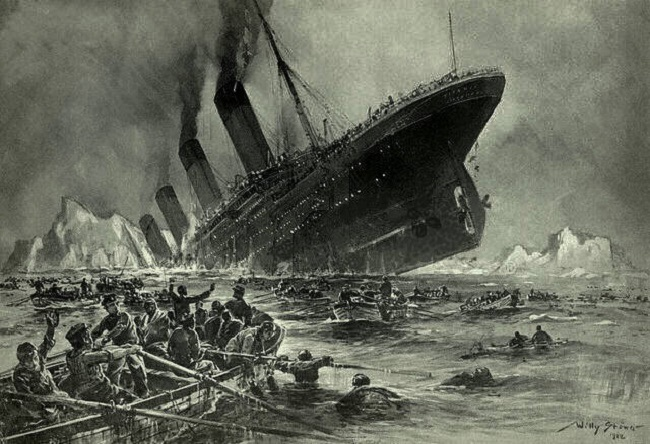

### The Royal Mail Ship Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. **                                      

This notebook performs an exploratory data analysis (EDA) of the titanic datasets and predicts the chances of survival of her passengers using machine learning algorithms. 

**source: https://en.wikipedia.org/wiki/Titanic

### First, we import some necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
'''Loading the datasets'''

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.10,NaN,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S


In [4]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.25,D37,C
16,908,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.35,NaN,Q
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.70,C101,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### The dataset has about 11 columns, some of which are explained below;
    PassengerId: unique IDs for each passenger onboard.
    
    Pclass: passenger's socio-economic class, i.e 1st, 2nd or 3rd.
    
    SibSp: number of siblings and spouses of each passenger.
    
    Parch: number of parents and children of each passenger.
    
    Embarked: location where the passengers embarked from(either S-Southampton, Q-Queenstown or C-Cherbourg)

### Missing values

In [7]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [8]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [9]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


The missing values are seen to come from the 'Embarked', 'Age', 'Cabin' and 'Fare' features. Taking a look at each of them.....

#### Embarked feature

In [10]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Only 2 passengers have missing values for point from which they embarked the ship. These passengers are some similar features; Pclass, Sex,Fare, Cabin, Ticket.....We can plot to take a guess on their 'Embarked' values.

Text(0.5, 1.0, 'Test Set')

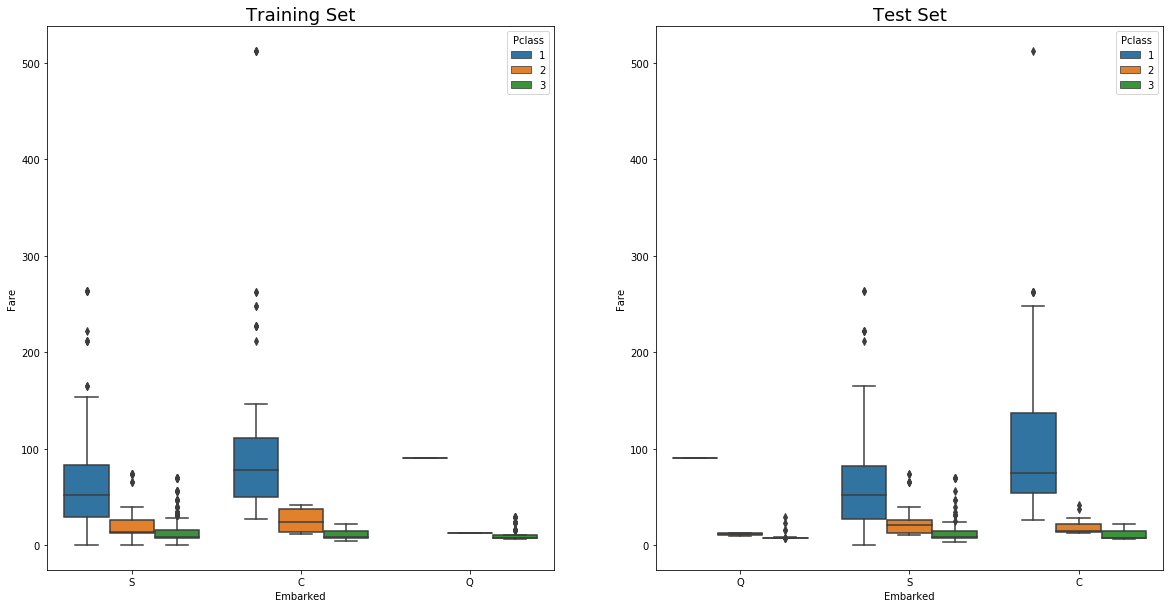

In [11]:
fig, ax = plt.subplots(figsize = (20,10), ncols = 2)

ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0])
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1])
#ax2 = sns.boxplot(x="Embarked", y="Ticket", hue="Pclass", data=train, ax = ax[1])"""Ticket feature appears to be non numeric"""


ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

From both plots, the fare closest to 80 for Pclass value 1 belong to the 'C' embarked value. I'll like to try this out with the 'sex' feature.

Text(0.5, 1.0, 'Test Set')

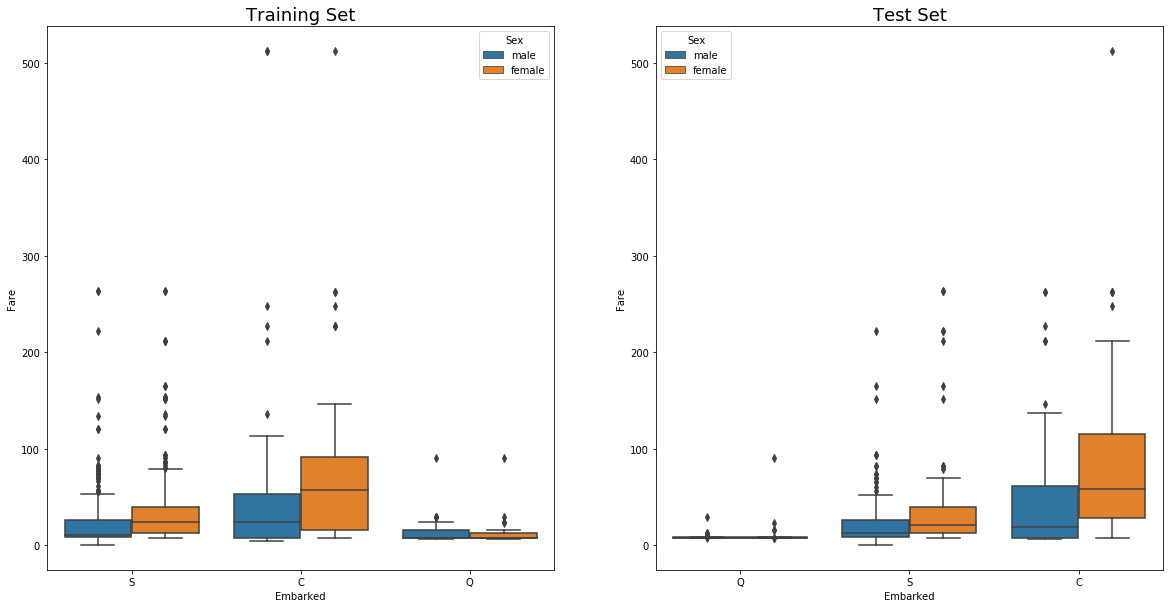

In [12]:
fig, ax = plt.subplots(figsize = (20,10), ncols = 2)

ax3 = sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=train, ax = ax[0])
ax4 = sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=test, ax = ax[1])

ax3.set_title("Training Set", fontsize = 18)
ax4.set_title('Test Set',  fontsize = 18)

Similarly, for both plots here also, the female fare closest to 80 belongs to the 'C' embarked value. It's safe to assign 'C' to those 'Nan'  embarked values.

In [13]:
train.Embarked.fillna('C', inplace = True)

To confirm there are no missing values in the 'Embarked' feature.....

In [14]:
def missing_checkers(feature):
    check = train[feature].isnull().sum()
    print("There are {} missing '{}' values now.".format(check, feature))
    print()

    if check == 0:
        print("There we go, no more Nan values.")
    else:
        print("Ooppss!!!! What did we do wrong? Let's have a quick review of our replacement.")

In [15]:
missing_checkers('Embarked')    

There are 0 missing 'Embarked' values now.

There we go, no more Nan values.


Moving on to 'Fare' feature. 

#### Fare feature

In [16]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Just 1 passenger has a missing 'Fare' value. Let's work around this. We can take the average of 'Pclass-3', 'Sex-male' to replace the missing value.

In [17]:
miss_avg_fare = round(test[(test.Pclass == 3) & (test.Sex == 'male')]['Fare'].mean(), 4)
print('The missing value will be replaced with {}.'.format(miss_avg_fare))

The missing value will be replaced with 11.8264.


In [18]:
test.Fare.fillna(miss_avg_fare, inplace = True)

In [19]:
missing_checkers('Fare')

There are 0 missing 'Fare' values now.

There we go, no more Nan values.


Moving on to 'Age' feature.

#### Age feature

In [20]:
def missing_info(df, feature):
    miss_feature = df[feature].isnull().sum()
    miss_feature_perc = round(df[feature].isnull().sum()/len(df) * 100, 2)
    
    print('There are {} missing values in the '.format(miss_feature) + feature + ' feature.')
    print()
    print('These values contribute {}% of this '.format(miss_feature_perc) + 'dataset.')

In [21]:
missing_info(test, 'Age')

There are 86 missing values in the Age feature.

These values contribute 20.57% of this dataset.


In [22]:
missing_info(train, 'Age')

There are 177 missing values in the Age feature.

These values contribute 19.87% of this dataset.


The Age feature contributes to about 20% of the missing values for both test and train dataset.....How do we fill these??? Let's move on and revisit this soon.

#### Cabin feature

In [23]:
missing_info(train, 'Cabin')

There are 687 missing values in the Cabin feature.

These values contribute 77.1% of this dataset.


We clearly see that the Cabin feature has the highest missing values. Let's see if we can make some sense or assumptions out of this, I really don't want to give up on this data sooo quick....lol

In [24]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Notice how the cabin values start with an alphabet and then 3 numbers. Most likely, all the values are unique, except ofcourse the NaN values. 

Let's categorize these values based on the alphabets. But first replace all Nan values with N.

In [25]:
test.Cabin.fillna('N', inplace = True)    

#Replacing all NaN values with 'N'

In [26]:
train.Cabin.fillna('N', inplace = True)

#Replacing all NaN values with 'N'

In [27]:
train.Cabin = [i[0] for i in train.Cabin]

In [28]:
test.Cabin = [i[0] for i in test.Cabin]

Let's visualize the relationship between the Cabins and point where are passengers embarked from. We can also have a look at how the Pclass is related to these allocated cabins.

Text(0.5, 1.0, 'Pclass Cabins')

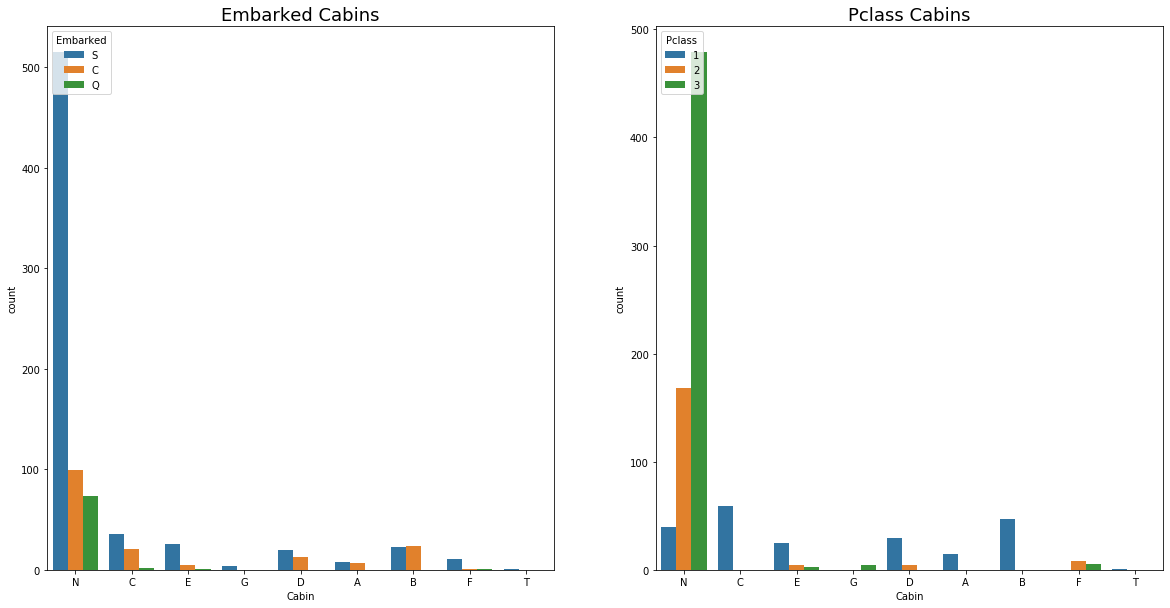

In [29]:
fig, ax = plt.subplots(figsize = (20,10), ncols = 2)

ax1 = sns.countplot(x="Cabin", hue="Embarked", data=train, ax = ax[0])
ax2 = sns.countplot(x="Cabin", hue="Pclass", data=train, ax = ax[1])


ax1.set_title("Embarked Cabins", fontsize = 18)
ax2.set_title('Pclass Cabins',  fontsize = 18)

From our plots above, over 500 passengers with missing cabin records embarked from 'S' (Southampton). Similarly, close to 500 passengers belong to the Pclass-3 (lower class). 

This means most of the passengers with missing cabin records were lower class and embarked from Southampton.

The fare could also be a factor to the cabin allocated to each passenger. Let's have a look at the cabin assigned vs average fare.

In [30]:
train.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     13.581250
F     18.696792
N     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

From this, we can have an idea of the average fee for each cabin. This isn't exact, but we can create a function to re-assign cabins (those with 'N' values) based on the fare paid by passengers.

In [31]:
def cabin_reassign(fare):
    cabin = 0
    if fare <= 16:
        cabin = 'G'
    elif 17 <= fare <= 26:
        cabin = 'F'
    elif 27 <= fare <= 37:
        cabin = 'T'
    elif 38 <= fare <= 42:
        cabin = 'A'
    elif 43 <= fare <= 51:
        cabin = 'E'
    elif 52 <= fare <= 78:
        cabin = 'D'
    elif 79 <= fare <= 106:
        cabin = 'C'
    else:
        cabin = 'B'
    return cabin

In [32]:
train['NewCabin'] = train['Fare'].apply(lambda x: cabin_reassign(x))
test['NewCabin'] = test['Fare'].apply(lambda x: cabin_reassign(x))

#re-assigning cabin values with a new column(NewCabin).

Now, we have no missing values again. Ok........... Ok........let's check.

In [33]:
missing_checkers('NewCabin')

There are 0 missing 'NewCabin' values now.

There we go, no more Nan values.


Let's take a look at sample data from both train and test dataset just before moving on.

In [34]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewCabin
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.775,N,S,G


In [35]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewCabin
193,1085,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.35,N,Q,G


### MOVING OOOOONNNN!!!

###### Making some survival assumptions on how features are related.

1. Pclass: higher class passengers, survived more than lower class passengers.
2. Age: younger passengers survived more than older ones.
3. Sex: most survivors were females.
4. SibSp: passengers with fewer dependants(siblings and spouses) survived more.

Time to create some visualization.......

#### Pclass

In [36]:
trClass = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count()#.reset_index()
#picking the train dataset, we group the data by the class and survivors.

trClass.head()

PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372

In [37]:
trClass_pvt = pd.pivot_table(trClass, values = 'PassengerId', index = 'Pclass', columns = 'Survived')
#Creating a pivot table for 'Survived' and 'Pclass'

trClass_pvt.head()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [38]:
names = ['Didn\'t Survive', 'Survived']              #Changing 0s and 1s to actual titles.
trClass_pvt.columns = names

trClass_pvt.head()

,Didn't Survive,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


In [39]:
r = [0,1,2]
totals = [i+j for i, j in zip(trClass_pvt['Didn\'t Survive'], trClass_pvt['Survived'])]
perc_DS = [i / j * 100 for i,j in zip(trClass_pvt['Didn\'t Survive'], totals)]
perc_S = [i / j * 100 for i,j in zip(trClass_pvt['Survived'], totals)]

Text(0, 0.5, 'Percentage')

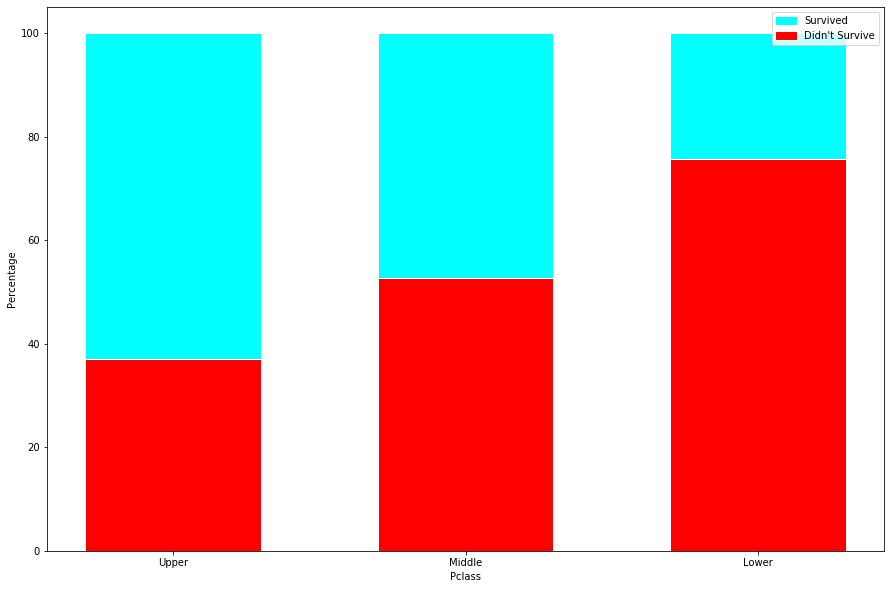

In [40]:
plt.subplots(figsize = (15,10))
classes = ('Upper', 'Middle', 'Lower')
colors = {'Survived': 'cyan', 'Didn\'t Survive': 'Red'}
labels = list(colors.keys())
plt.bar(r, perc_DS, color ='Red', edgecolor = 'white', width = 0.6)
plt.bar(r, perc_S, bottom = perc_DS, color = 'cyan', edgecolor = 'white', width = 0.6)
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc = 'best')

plt.xticks(r, classes)
plt.xlabel("Pclass")
plt.ylabel('Percentage')


#plt.show()

From the above plot, it is obvious that most of the survivors came from the upper class passengers as we earlier assumed. 

###### Age

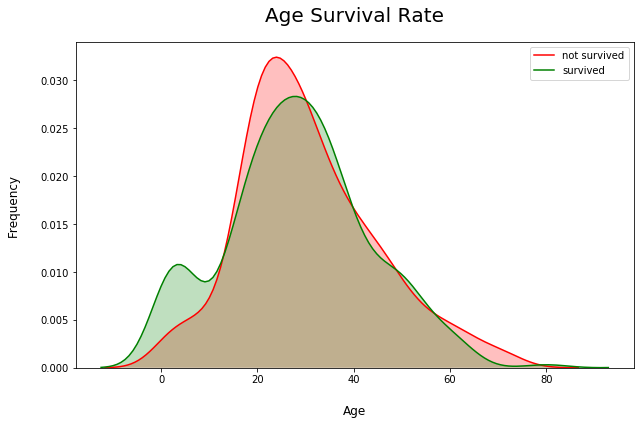

In [41]:
fig = plt.figure(figsize=(10,6),)

ax = sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'], color = 'red', shade=True, label = 'not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'], color = 'green',shade = True, label = 'survived')

plt.title('Age Survival Rate', fontsize = 20, pad = 20)
plt.xlabel("Age", fontsize = 12, labelpad = 20)
plt.ylabel('Frequency', fontsize = 12, labelpad = 20);

It is pretty obvious here that slope declined with increasing age.

###### Sex

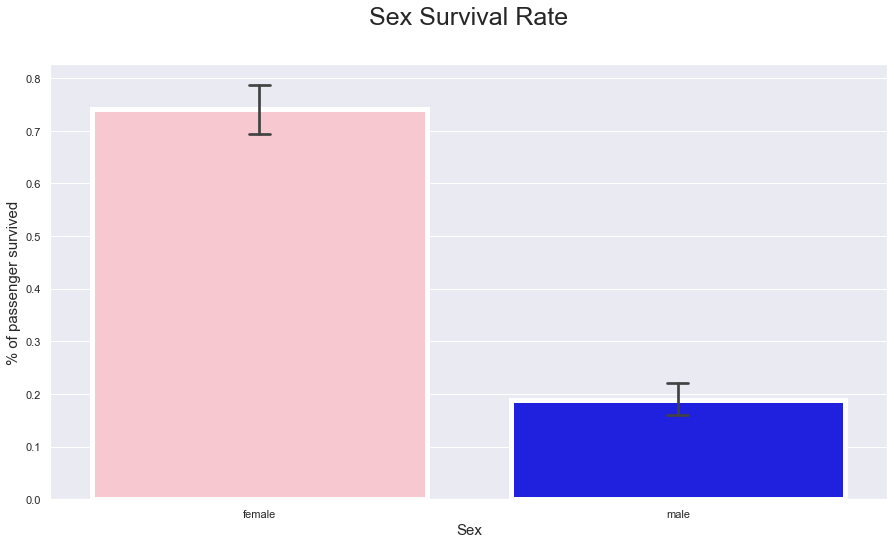

In [42]:
pal = {'male':"blue", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,
                )

plt.title("Sex Survival Rate", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);


We can see from the plot above that over 70% of survivors were female and less than 20% male.

###### Sibsp

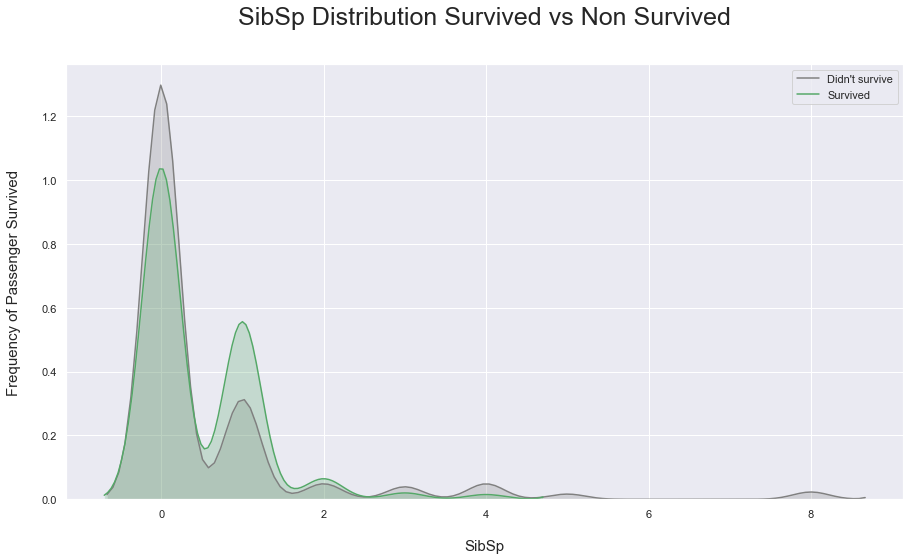

In [43]:
fig = plt.figure(figsize=(15,8),)

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'SibSp'] , color='gray',shade=True,label='Didn\'t survive')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'SibSp'] , color='g',shade=True, label='Survived')

plt.title('SibSp Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("SibSp", fontsize = 15, labelpad = 20);

Contrary to our assumption; the frequency of survived passengers with 0 siblings and spouse is lower than those that didn't survive. However, as the number of siblings and spouse increase, the frequency fluctuates. Just maybe, these 2 features('Survived' and 'SibSp') aren't correlated as much.

This leads us to check the correlation of features with 'Survived' feature. 

##### Correlations

In [44]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


In [45]:
def Sex_change(x):
    if x == 'male':
        Sex = 1
    else:
        Sex = 0
    return Sex

In [46]:
train['Sex'] = train['Sex'].apply(lambda x: Sex_change(x))
test['Sex'] = test['Sex'].apply(lambda x: Sex_change(x))

#representing 1 for males and 0 for females.

In [47]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Now we can see that the feature 'Sex' has the highest correlation with 'Survived'

In [48]:
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.295231
Pclass         0.114569
Fare           0.066207
Parch          0.006663
Age            0.005963
SibSp          0.001248
PassengerId    0.000025
Name: Survived, dtype: float64

###### Squaring the correlation feature not only gives on positive correlations but also amplifies the relationships.

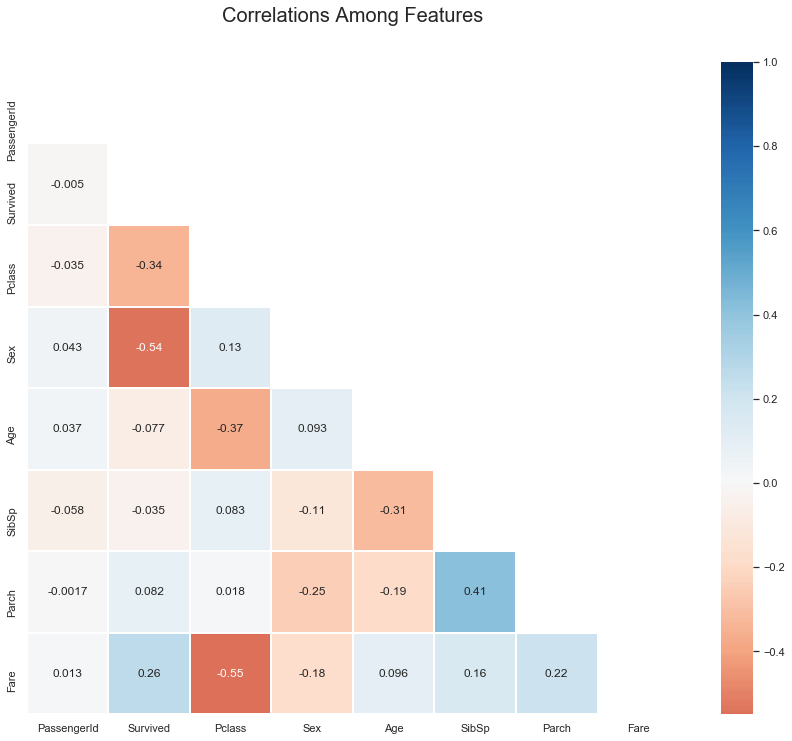

In [49]:
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

We can find some significant relationships between some features. For example; 'Fare' is strongly correlated to 'Survived', this could imply that the passengers who paid more were more likely to survive. 

### PRE-MODELLING

Just before we proceed, it's advisable we work around some of our features. Eliminate some, add some, just to have a good model.

Let's have a look at all present features.

In [50]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewCabin
158,159,0,3,"Smiljanic, Mr. Mile",1,NaN,0,0,315037,8.6625,N,S,G


###### Passenger Id & Name

Since passenger Id and name wouldn't be needed as such, let's drop this column.

In [51]:
train.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
test.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

###### Pclass

Here, we will create a function group based on the class of the passengers.

In [52]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [53]:
def Pclass_group(plass):

    if plass == 3:
        p = 'High Class'
    elif plass == 2:
        p = 'Medium Class'
    else:
        p = "Low Class"
    return p

train['Pclass_group'] = train['Pclass'].map(Pclass_group)
test['Pclass_group'] = test['Pclass'].map(Pclass_group)

###### SibSp and Parch

Here, we will merge siblings, spouses, parents and children all together as 'Dependants'. 

N.B: Don't forget to add the main passenger (+1)

In [54]:
train['Total on Board'] = train.SibSp + train.Parch + 1
test['Total on Board'] = test.SibSp + test.Parch + 1

In [55]:
def TOB_group(dependants):
    """
    This function creates a family size based on the number of dependants.
    """
    
    fam_size= ''
    
    if dependants == 1:
        fam_size = 'Single passenger'
    elif dependants <= 3:
        fam_size = 'Small family'
    elif dependants <= 6:
        fam_size = 'Medium family'
    else:
        fam_size = "Large family"
    return fam_size

train['Family size'] = train['Total on Board'].map(TOB_group)
test['Family size'] = test['Total on Board'].map(TOB_group)

###### Fare

To calculate the approximate fare per person, we can divide the fare by the number of dependants. 

In [56]:
train['Approx_fare'] = train.Fare/train['Total on Board']
test['Approx_fare'] = test.Fare/test['Total on Board']

In [57]:
def price_group(fare):
    """
    This function creates a fare group based on the fare provided to reduce the ambiguity of dummy variables that will be created
    """
    
    a= ''
    if fare <= 4:
        a = 'Lowest_suite'
    elif fare <= 10:
        a = 'Low_suite'
    elif fare <= 20:
        a = 'Economy_suite'
    elif fare <= 45:
        a = 'High_suite'
    else:
        a = "First_parlor_suite"
    return a

train['Price_group'] = train['Approx_fare'].map(price_group)
test['Price_group'] = test['Approx_fare'].map(price_group)

###### Now, it's time to re-visit the 'Age' feature. We will use CatBoostRegressor to predict the missing age values. 

To make it easier, let's concantenate the features we intend using and drop some.

In [58]:
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch", "Pclass_group"]], train.loc[:,"Total on Board":]], axis=1)

test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)
test.drop(['Ticket', 'Cabin', 'NewCabin', 'Embarked', 'Fare'], axis = 1, inplace = True)

Just before we predict with CatBoost, we need to transform the categorical features using 'astype'. This will be done for both the train and test data.

In [59]:
train_cats = ['Pclass_group', 'Sex', 'Family size', 'Price_group']

for i in train_cats:
    train[i] = train[i].astype("category").cat.codes
    
    
train.sample(3)

,Survived,Age,Sex,SibSp,Parch,Pclass_group,Total on Board,Family size,Approx_fare,Price_group
389,1,17.0,0,0,0,2,1,2,12.000000,0
504,1,16.0,0,0,0,1,1,2,86.500000,1
140,0,NaN,0,0,2,0,3,3,5.081933,3


In [60]:
test_cats = ['Pclass_group', 'Sex', 'Family size', 'Price_group']

for i in test_cats:
    test[i] = test[i].astype("category").cat.codes
    
    
test.sample(3)

,Age,Sex,SibSp,Parch,Pclass_group,Total on Board,Family size,Approx_fare,Price_group
25,50.0,1,1,0,0,2,3,7.250,3
97,29.0,1,0,0,0,1,2,7.925,3
180,30.0,1,0,0,2,1,2,13.000,0


In [61]:
from catboost import CatBoostRegressor

'''
Creating a function to predict the missing values and replaces them.

'''

def missing_ages(df):
    age_df = df.loc[:,"Age":]
    
    age_values= age_df.loc[age_df.Age.notnull()] 
    #to get the df with non missing age values
    
    age_nullvalues = age_df.loc[age_df.Age.isnull()]
    age_nullvalues.drop('Age', axis = 1, inplace = True)
    #to get the df with missing age values but dropping the 'Age' column 
    
    x = age_values.loc[:, "Sex":].values
    #a numpy array of all the corresponding age_values. These are the independent variables 
    y = age_values.Age.values 
    # a numpy array of the age values. These are the dependent variables.
    
    model = CatBoostRegressor(silent = True, iterations=992, learning_rate=0.269, depth=7, loss_function='RMSE', random_seed=42)
    # Fit model
    model.fit(x, y)
    # Get predictions
    pred = model.predict(age_nullvalues.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = pred
    #replacing the missing values with the predicted values
    
    accuracy = model.score(x,y)
    print("Accuracy is : " + str(accuracy))
    
    return df

missing_ages(train)
missing_ages(test)


C:\Users\Funmi\Downloads\ANACONDA\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Accuracy is : 0.7358213672647556
Accuracy is : 0.8795499665017406


,Age,Sex,SibSp,Parch,Pclass_group,Total on Board,Family size,Approx_fare,Price_group
0,34.500000,1,0,0,0,1,2,7.829200,3
1,47.000000,0,1,0,0,2,3,3.500000,4
2,62.000000,1,0,0,2,1,2,9.687500,3
3,27.000000,1,0,0,0,1,2,8.662500,3
4,22.000000,0,1,1,0,3,3,4.095833,3
...,...,...,...,...,...,...,...,...,...
413,26.557372,1,0,0,0,1,2,8.050000,3
414,39.000000,0,0,0,1,1,2,108.900000,1
415,38.500000,1,0,0,0,1,2,7.250000,3
416,26.557372,1,0,0,0,1,2,8.050000,3


Awesome, we have filled all missing age values. Let's group them just as we did for the other features earlier. 

In [62]:
def Age_group(age):
    """
    This function creates a age group based on the WHO standards.....lol...I'm extra like that....:)
    """
    
    ag= ''
    
    if age <= 1:
        ag = 'Infant'
    elif age <= 9:
        ag = 'Child'
    elif age <= 19:
        ag = 'Adolescent'
    else:
        ag = "Adult"
    return ag

train['Age_group'] = train['Age'].map(Age_group)
test['Age_group'] = test['Age'].map(Age_group)

In [63]:
train.Age_group

0           Adult
1           Adult
2           Adult
3           Adult
4           Adult
          ...    
886         Adult
887    Adolescent
888    Adolescent
889         Adult
890         Adult
Name: Age_group, Length: 891, dtype: object

In [64]:
#Applying one-hot encoding to the age_group

train = pd.get_dummies(train, columns = ['Age_group'], drop_first=True)
test = pd.get_dummies(test, columns = ['Age_group'], drop_first=True)

In [65]:
test.sample(2)

,Age,Sex,SibSp,Parch,Pclass_group,Total on Board,Family size,Approx_fare,Price_group,Age_group_Adult,Age_group_Child,Age_group_Infant
53,28.000000,0,3,2,1,6,1,43.833333,2,1,0,0
301,40.529605,1,0,0,2,1,2,15.045800,0,1,0,0


In [66]:
train.sample(2)

,Survived,Age,Sex,SibSp,Parch,Pclass_group,Total on Board,Family size,Approx_fare,Price_group,Age_group_Adult,Age_group_Child,Age_group_Infant
324,0,10.869737,1,8,2,0,11,0,6.322727,3,0,0,0
199,0,24.000000,0,0,0,2,1,2,13.000000,0,1,0,0


### Now, we proceed to the main task of predicting the passengers that survived.

First, let's drop the dependent variable from the train data. Next, we split our train data using train_test_split, this will enable us to test the performance of our model just before we use it on the test data.

In [67]:
X = train.drop(['Survived'], axis = 1)
Y = train.Survived

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.67)

In [69]:
print('The length of the new X_train is ' + str(len(X_train)) + '.')
print()
print('The length of the new X_test is ' + str(len(X_test)) + '.')

The length of the new X_train is 596.

The length of the new X_test is 295.


We have about 1/3 of the train data to review our performance before using the main test data. 

For this review, we will be using the X_test and compare results gotten with the Y_test. 

###### Using RandomForest to train our data.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators = 180, min_samples_leaf = 3, random_state = 5, n_jobs = -1)
clf.fit(X_train, Y_train)
pred2 = clf.predict(X_test)
accuracy2 = accuracy_score(Y_test, pred2)
print("Accuracy using one-third of the train dataset is : " + str(accuracy2))

Accuracy using one-third of the train dataset is : 0.8169491525423729


###### Time to evaluate our model

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

indexes = ['Died', 'Survived']
columns = ['Predicted Died', 'Predicted Survived']
print(classification_report(Y_test, pred2, target_names = indexes))

              precision    recall  f1-score   support

        Died       0.85      0.86      0.86       186
    Survived       0.76      0.74      0.75       109

    accuracy                           0.82       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295



From the above report, the following questions were answered;

1.) Precision: of the passengers predicted 'survived', how many actually survived?
2.) Recall: of the passengers that actually survived, how many were predicted 'survived'?

In [72]:
pd.DataFrame(confusion_matrix(Y_test, pred2), columns = columns, index=indexes)

,Predicted Died,Predicted Survived
Died,160,26
Survived,28,81


From the report above, out of the 295 X_test data;

a.) 174 passengers actually died. Our model predicted 160 to have died.
b.) 121 passengers actually survived. Our model predicted 91 to have survived. 

###### Using the main train and test dataset.

In [73]:
test.sample(3)

,Age,Sex,SibSp,Parch,Pclass_group,Total on Board,Family size,Approx_fare,Price_group,Age_group_Adult,Age_group_Child,Age_group_Infant
115,18.0,1,1,0,0,2,3,7.2271,3,0,0,0
11,46.0,1,0,0,1,1,2,26.0000,2,1,0,0
34,30.0,1,1,0,1,2,3,28.8750,2,1,0,0


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_m = RandomForestClassifier(n_estimators = 180, min_samples_leaf = 3, random_state = 5, n_jobs = -1)
clf_m.fit(X, Y)
pred_m = clf.predict(test)

In [75]:
gender = pd.read_csv("gender_submission.csv")

In [84]:
submission = pd.DataFrame({'PassengerId':gender['PassengerId'],'Survived':pred_m})

submission.sample(10)

,PassengerId,Survived
352,1244,0
49,941,1
248,1140,1
345,1237,1
186,1078,1
383,1275,1
393,1285,0
236,1128,1
287,1179,1
313,1205,0


In [85]:
submission.to_csv("My_submission.csv", index=False)

#### THIS IS MY VERY FIRST ML PROJECT. I'M GLAD I COMPLETED TO THIS STAGE.

I AM STILL WORK IN PROGRESS...

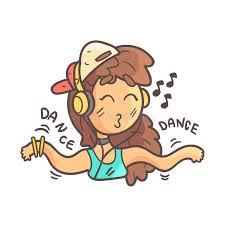
